In [1]:
from generate_descriptors import generate_descriptors
import matplotlib.pyplot as plt
import numpy as np
from NMR_predict import GPR_NMR

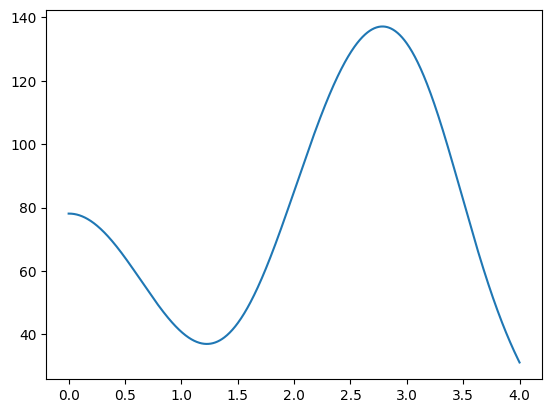

In [5]:
test_params = [4.0, 1000]
descriptor_path = '/home/alex/Pt_NMR/data/representations/APE_RF/'
xyz_path = '/home/alex/Pt_NMR/data/structures/'

gen = generate_descriptors(descriptor_params=test_params, descriptor_path=descriptor_path, xyz_path=xyz_path, central_atom='Pt',
                           xyz_base='st_')

APE_RF_dataset = gen.get_APE_RF(save=False, smooth_cutoff=False)

r = np.linspace(0.0, test_params[0], test_params[1])
ape_rf = APE_RF_dataset[44]

plt.plot(r, ape_rf)
plt.show()

# TODO: maybe try Gaussian decay for smoothing because only one smoothing parameter has to be adjusted


RMSE (4-fold CV): 219.62768885745155 [ppm] 24.6536586660501 [ppm] (STDEV)
MAE (4-fold CV): 149.6801421734234 [ppm] 6.211931428922547 [ppm] (STDEV)


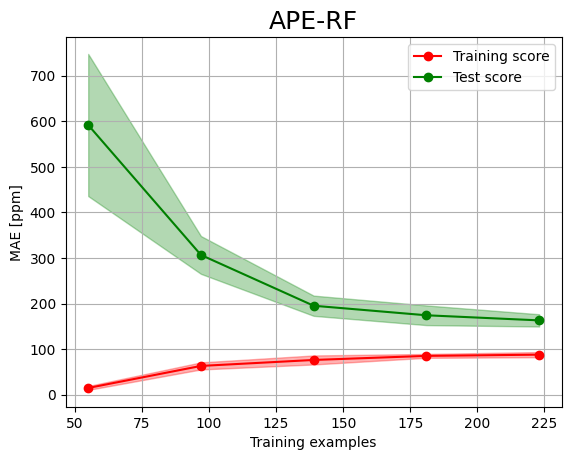

Outliers (13):
------------
Compound Name: fac-[PtBr3F3] 2-, Observed: 2487, Predicted: 2238.0, Residual: 249.0
Compound Name: trans-[Pt(SMe2)I2], Observed: -5789, Predicted: -4876.8125, Residual: -912.1875
Compound Name: cis-[Pt(PMe3)I2], Observed: -4588, Predicted: -5700.5625, Residual: 1112.5625
Compound Name: trans-Pt(SCN)2(SbMe3)2, Observed: -4570, Predicted: -5577.625, Residual: 1007.625
Compound Name: trans-[Pt(AsMe3)I2], Observed: -5518, Predicted: -5027.5, Residual: -490.5
Compound Name: [Pt(NMe3)Cl3]-, Observed: -1715, Predicted: -2006.15625, Residual: 291.15625
Compound Name: trans-PtCl(SnCl3)(PEt3)2, Observed: -4780, Predicted: -5484.0625, Residual: 704.0625
Compound Name: cis-Pt(NCS)2(PMe3)2, Observed: -4372, Predicted: -4038.78125, Residual: -333.21875
Compound Name: trans-[Pt(AsMe3)Br2], Observed: -4378, Predicted: -4114.5625, Residual: -263.4375
Compound Name: cis-[PtMe2(PMe2Ph)2], Observed: -4594, Predicted: -4238.625, Residual: -355.375
Compound Name: [Pt(PMe3)Br3]-, 

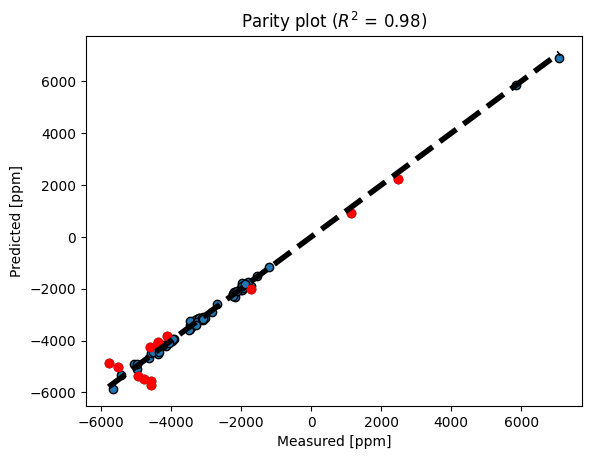

(149.6801421734234, 6.211931428922547, 219.62768885745155, 24.6536586660501)


In [3]:
XYZ_directory = '/home/alex/Pt_NMR/data/structures/'
SOAP_directory = '/home/alex/Pt_NMR/data/representations/APE_RF/'

# Define list of SOAP params [r_cut, n_max, l_max]
params = [4.0, 1000]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=SOAP_directory, descriptor_type='APE-RF',
                 descriptor_params=params, central_atom='Pt', mode ='write', xyz_path=XYZ_directory, xyz_base='st_')

target_name = 'Experimental'
target_path = '/home/alex/Pt_NMR/data/labels/final_data_corrected'

# Use predict function for regression and obtaining CV prediction errors

errors_std = pt_gpr.GPR_predict(kernel_degree=2,
                            target_path=target_path, target_name=target_name,
                            normalize=False, noise=1.0, parity_plot=True, lc=True)

print(errors_std)